In [68]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [69]:
img = cv2.imread(r'C:\Users\Zenbook\Downloads\elephant.jpg')

In [70]:
print(img.shape)

(330, 500, 3)


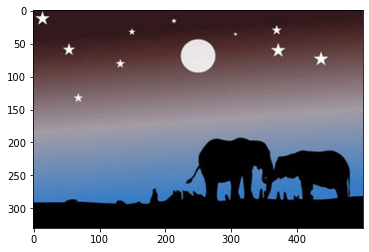

In [71]:
original_img= img
plt.imshow(img)
plt.show()

In [72]:
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
print(img.shape)

(330, 500, 3)


In [73]:
all_pixels = img.reshape((330*500,3))
print(all_pixels.shape)

(165000, 3)


In [74]:
from sklearn.cluster import KMeans

In [75]:
dominant_colors = 5
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=5)

In [76]:
centers = km.cluster_centers_
print(centers)

[[ 97.45613791  94.10909912 117.91224107]
 [  1.49290472   0.83472343   1.1537214 ]
 [166.13286542 151.55075689 152.44131961]
 [188.32962837 133.22208553  85.75797556]
 [ 37.92815899  35.19478985  64.38436954]]


In [77]:
centers = np.array(centers , dtype = int)

In [78]:
print(centers)

[[ 97  94 117]
 [  1   0   1]
 [166 151 152]
 [188 133  85]
 [ 37  35  64]]


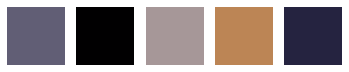

In [79]:
colors=[]
i=1
for each_col in centers:
    colors.append(each_col)
    plt.subplot(2,5,i)
    i+=1
    plt.axis('off')
    a= np.zeros((200,200,3),dtype=int)
    a[:,:,:]=each_col
    plt.imshow(a)

In [80]:
new_img = np.zeros((330*500,3),dtype=int)
a= km.labels_
print(new_img.shape)
print(a.shape)
print(colors)

(165000, 3)
(165000,)
[array([ 97,  94, 117]), array([1, 0, 1]), array([166, 151, 152]), array([188, 133,  85]), array([37, 35, 64])]


In [81]:
for each_pixel in range(new_img.shape[0]):
    new_img[each_pixel] = colors[km.labels_[each_pixel]]
    
print(new_img.shape)
new_img = new_img.reshape((original_img.shape))    

(165000, 3)


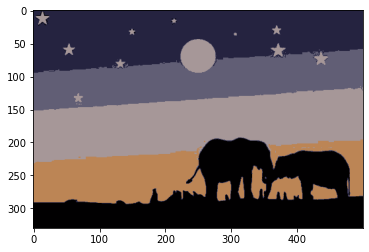

In [83]:
plt.imshow(new_img)
plt.show()